## Dataset from Kaggle : 
link : https://www.kaggle.com/competitions/playground-series-s3e12/data


In [1]:
import pandas as pd
train = pd.read_csv('train.csv')
train

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


# Using Domain Knowledge for Feature Engineering 
(Using Chatgpt got the values for normal, high and low ranges affective for kidney stone)

In [3]:
train.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [4]:
 #   Low = -1, Normal = 0, High = 1
import numpy as np
train['Urea_range'] = np.where( train['urea'] < 250, -1 , np.where(train['urea'] > 650,1, 0))
train['Urea_range']

0     -1
1      0
2     -1
3      0
4      0
      ..
409   -1
410   -1
411    0
412   -1
413   -1
Name: Urea_range, Length: 414, dtype: int32

In [5]:
train['Urea_range'].value_counts()

 0    226
-1    188
Name: Urea_range, dtype: int64

<Axes: xlabel='Urea_range', ylabel='count'>

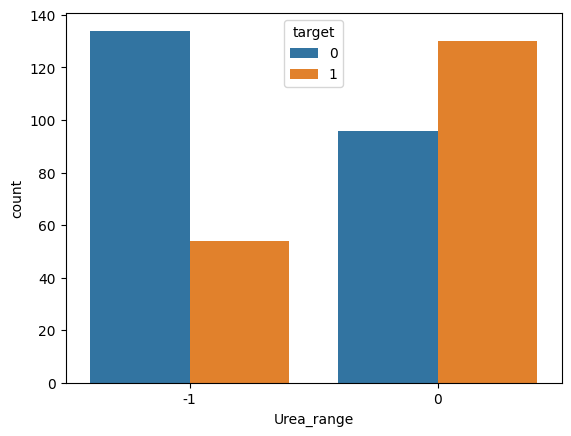

In [6]:
import seaborn as sns
sns.countplot(data=train, x='Urea_range', hue='target')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          414 non-null    int64  
 1   gravity     414 non-null    float64
 2   ph          414 non-null    float64
 3   osmo        414 non-null    int64  
 4   cond        414 non-null    float64
 5   urea        414 non-null    int64  
 6   calc        414 non-null    float64
 7   target      414 non-null    int64  
 8   Urea_range  414 non-null    int32  
dtypes: float64(4), int32(1), int64(4)
memory usage: 27.6 KB


In [8]:
 #specific gravity High = 1, Low = -1, Normal=0
import numpy as np
train['ph_range'] = np.where( train['ph'] < 5, -1 , np.where(train['ph'] > 7,1, 0))
train['ph_range']

0      0
1      0
2      0
3     -1
4      0
      ..
409    0
410    0
411    0
412    1
413    0
Name: ph_range, Length: 414, dtype: int32

In [9]:
train['ph_range'].value_counts()

 0    371
 1     33
-1     10
Name: ph_range, dtype: int64

<Axes: xlabel='ph_range', ylabel='count'>

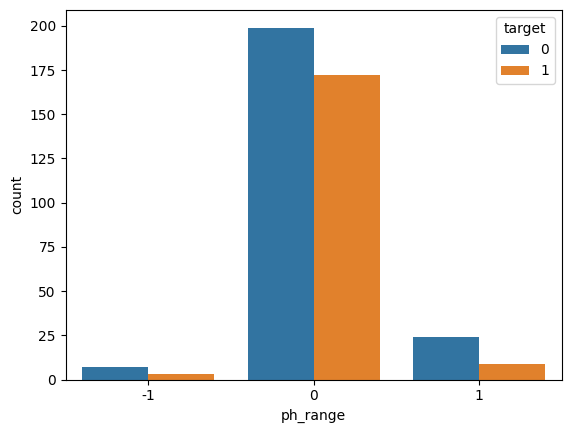

In [10]:
import seaborn as sns
sns.countplot(data=train, x='ph_range', hue='target')

### The ratio for all categories is the same thus not a useful feature

In [11]:
 #   Low = -1, Normal = 0, High = 1
import numpy as np
train['conductivity_range'] = np.where( train['cond'] < 1, -1 , np.where(train['cond'] > 34,1, 0))
train['conductivity_range']

0      0
1      0
2      0
3      0
4      0
      ..
409    0
410    0
411    0
412    0
413    0
Name: conductivity_range, Length: 414, dtype: int32

In [12]:
train['conductivity_range'].value_counts()

0    401
1     13
Name: conductivity_range, dtype: int64

### Highly imbalnced Data, Not useful

In [13]:
 #   Low = -1, Normal = 0, High = 1
import numpy as np
train['gravity_range'] = np.where( train['gravity'] < 1.005, -1 , np.where(train['gravity'] > 1.030,1, 0))
train['gravity_range']

0      0
1      0
2      0
3      0
4      0
      ..
409    0
410    0
411    0
412    0
413    0
Name: gravity_range, Length: 414, dtype: int32

In [14]:
train['gravity_range'].value_counts()

0    397
1     17
Name: gravity_range, dtype: int64

<Axes: xlabel='gravity_range', ylabel='count'>

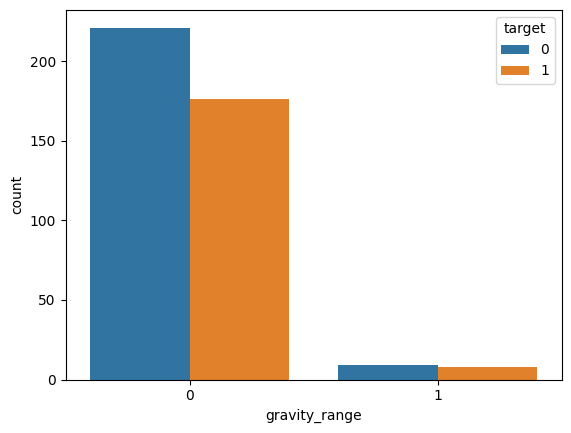

In [15]:
import seaborn as sns
sns.countplot(data=train, x='gravity_range', hue='target')

### Again Highly imbalanced data

In [16]:
 #   Low = -1, Normal = 0, High = 1
import numpy as np
train['calcium_range'] = np.where( train['calc'] < 2.5, -1 , np.where(train['calc'] > 7.5,1, 0))
train['calcium_range']

0     -1
1      0
2      1
3      0
4     -1
      ..
409   -1
410   -1
411    1
412   -1
413   -1
Name: calcium_range, Length: 414, dtype: int32

In [17]:
train['calcium_range'].value_counts()

-1    182
 0    161
 1     71
Name: calcium_range, dtype: int64

<Axes: xlabel='calcium_range', ylabel='count'>

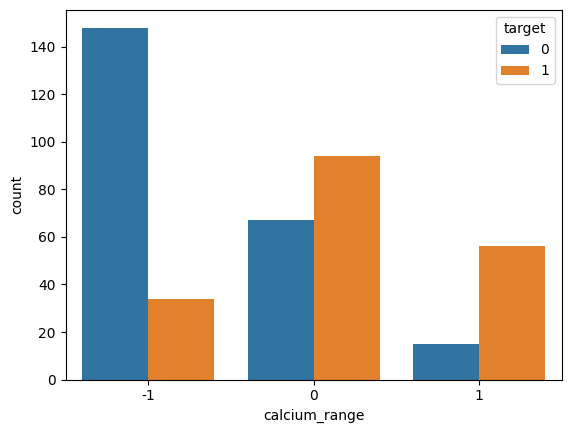

In [18]:
import seaborn as sns
sns.countplot(data=train, x='calcium_range', hue='target')

### Here we can see a neg corr in clacium range and target feature and the presence of kidney stone is a guassian distribution not providing much information .
Matter of concern : The ppl with normal calcium range are more prone to have stone .(According to the gn data)

In [19]:
train.drop(columns=['id', 'ph_range', 'conductivity_range', 'gravity_range'], inplace=True)
train

,gravity,ph,osmo,cond,urea,calc,target,Urea_range,calcium_range
0,1.013,6.19,443,14.8,124,1.45,0,-1,-1
1,1.025,5.40,703,23.6,394,4.18,0,0,0
2,1.009,6.13,371,24.5,159,9.04,0,-1,1
3,1.021,4.91,442,20.8,398,6.63,1,0,0
4,1.021,5.53,874,17.8,385,2.21,1,0,-1
...,...,...,...,...,...,...,...,...,...
409,1.011,5.21,527,21.4,75,1.53,0,-1,-1
410,1.024,5.53,577,19.7,224,0.77,0,-1,-1
411,1.018,6.28,455,22.2,270,7.68,1,0,1
412,1.008,7.12,325,12.6,75,1.03,1,-1,-1


# Data Preprocessing 

### Handling Null

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gravity        414 non-null    float64
 1   ph             414 non-null    float64
 2   osmo           414 non-null    int64  
 3   cond           414 non-null    float64
 4   urea           414 non-null    int64  
 5   calc           414 non-null    float64
 6   target         414 non-null    int64  
 7   Urea_range     414 non-null    int32  
 8   calcium_range  414 non-null    int32  
dtypes: float64(4), int32(2), int64(3)
memory usage: 26.0 KB


No null values

### Handling Duplicates

In [21]:
train[train.duplicated()]

,gravity,ph,osmo,cond,urea,calc,target,Urea_range,calcium_range


In [22]:
for i in train.columns:
    if len(train[i].unique())> 5 and  train[i].value_counts().iloc[0] > len(train)/100*90:
        print('Value : ',train[i].value_counts().index[0],'Number of Occurances : ', train[i].value_counts().iloc[0])

 None of the records are repeated for a significant number of times

### Differenciating features into Continous and Discrete

In [23]:
continous_feat =  train.select_dtypes(include=['float', 'int64']).columns.tolist()
discrete_feat = train.select_dtypes(include=['int32']).columns.tolist()

print('Continous features : ', continous_feat, '\n Discrete features : ', discrete_feat)

Continous features :  ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'] 
 Discrete features :  ['Urea_range', 'calcium_range']


### EDA on Continous features

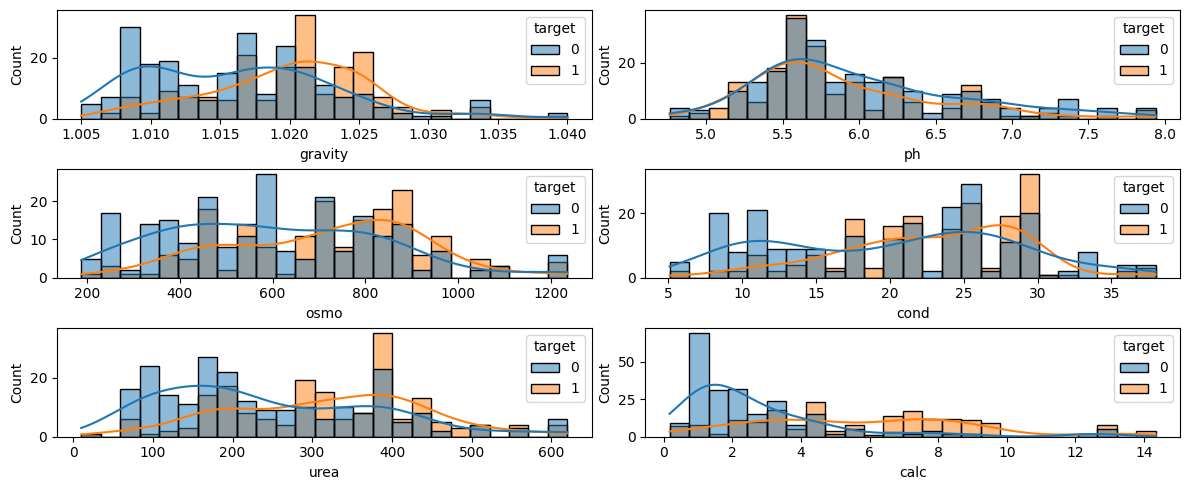

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(3, (len(continous_feat)+1)//3, figsize=(12,5))
axes = axes.flatten()

for i in range(len(continous_feat)-1):
    sns.histplot(x=train[continous_feat[i]] ,hue=train['target'], ax=axes[i], kde=True, bins=25)
    plt.tight_layout(h_pad=0.5,w_pad=0.5)
plt.show()

### Observations:
    1)Where gravity is high ppl are more likely to have kidney stone than the ppl with low gravity <br>
    2)As per the histogram PH does not distinctively classify people having kidney stone. <br>
    3)Conductivity of urine below 15 are most likely to not have the kidney stone though it doesnt distinctively classify the target
    4)The density of patients having Calcium more than 4 is higher for presence of kidney stone
    5)300 to 400 range  in Urea has a peak for target as 1 whaere as the preak for target 0 lies within 100 to 200 range
    6)Patients with 600+ range in Osmolarity mostly have the kidney stone where as the lower range patients do not.

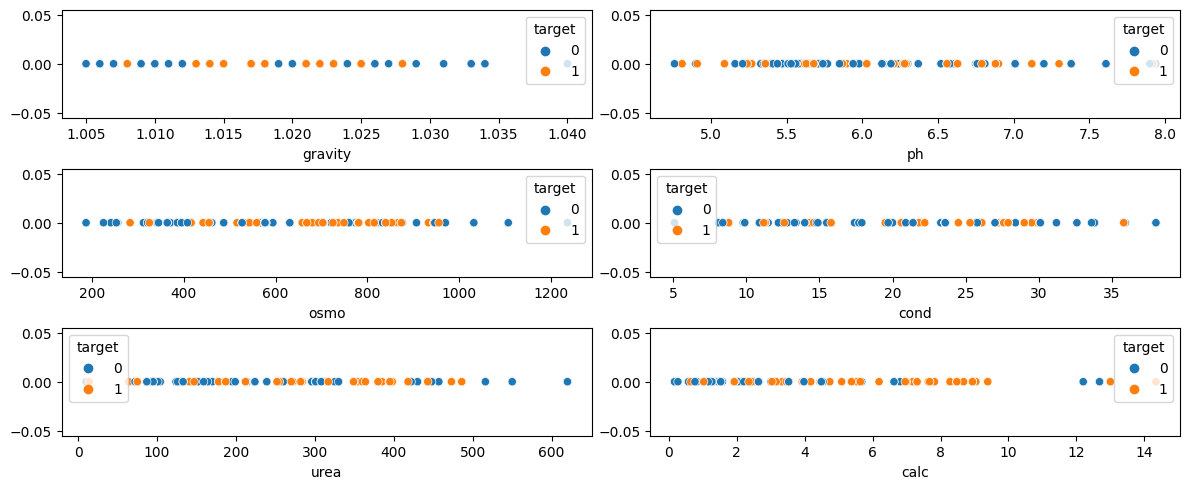

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(3, 2, figsize=(12,5))
axes = axes.flatten()

for i in range(len(continous_feat)-1):
    sns.scatterplot(x=train[continous_feat[i]], y=np.zeros(len(train)) ,hue=train['target'], ax=axes[i],)
    plt.tight_layout(h_pad=0.5,w_pad=0.5)
plt.show()

### Observations:
    Gravity and Calcium does have specific range bucket which classifies the Target.
    Whereas others dont classify presence and absence of kidney stone based on their range. 

### Handling Outliers 


In [26]:
def Outlier_counter(outlier, data, col):
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    IQR = q3-q1
    lower_bound = q1-IQR*1.5
    upper_bound = q3+IQR*1.5
    outliers = len(data[(data[col] < lower_bound) | (data[col] > upper_bound)])
    globals() [outlier] = outliers

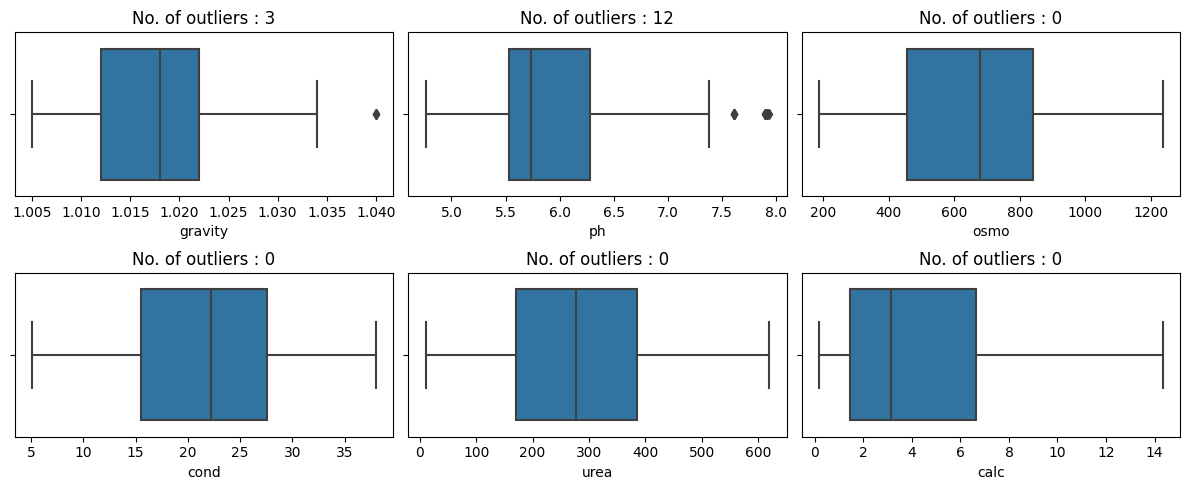

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(12,5))
axes = axes.flatten()

for i in range(len(continous_feat)-1):
    sns.boxplot(x=train[continous_feat[i]] ,hue=train['target'], ax=axes[i])
    Outlier_counter('ol', train, continous_feat[i])
    axes[i].set_title(f'No. of outliers : {ol}')
    plt.tight_layout(h_pad=0.8,w_pad=0.5)
plt.show()

import matplotlib.pyplot as plt
import numpy as np


Based on viusalization created by the boxplot we can see the outliers are just a handful, we will drop them . 

In [28]:
train.shape

(414, 9)

In [29]:
def Outlier_trimmer(data_name, data, col):
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    IQR = q3-q1
    lower_bound = q1-IQR*1.5
    upper_bound = q3+IQR*1.5
    data = data[(data[col] > lower_bound) & (data[col] < upper_bound)]
    globals() [data_name] = data

In [30]:
for i in range(len(continous_feat)):
    Outlier_counter('ol', train, continous_feat[i])
    if ol >0  :
        print(i, 'Applying Outlier_trimmer as Outlier count = ', ol)
        Outlier_trimmer('train', train.copy(), continous_feat[i])
        print(train.shape)
    else:
        print('No outliers ')

0 Applying Outlier_trimmer as Outlier count =  3
(411, 9)
1 Applying Outlier_trimmer as Outlier count =  12
(399, 9)
No outliers 
No outliers 
No outliers 
No outliers 
No outliers 


In [31]:
train

,gravity,ph,osmo,cond,urea,calc,target,Urea_range,calcium_range
0,1.013,6.19,443,14.8,124,1.45,0,-1,-1
1,1.025,5.40,703,23.6,394,4.18,0,0,0
2,1.009,6.13,371,24.5,159,9.04,0,-1,1
3,1.021,4.91,442,20.8,398,6.63,1,0,0
4,1.021,5.53,874,17.8,385,2.21,1,0,-1
...,...,...,...,...,...,...,...,...,...
409,1.011,5.21,527,21.4,75,1.53,0,-1,-1
410,1.024,5.53,577,19.7,224,0.77,0,-1,-1
411,1.018,6.28,455,22.2,270,7.68,1,0,1
412,1.008,7.12,325,12.6,75,1.03,1,-1,-1


### EDA on Discrete features

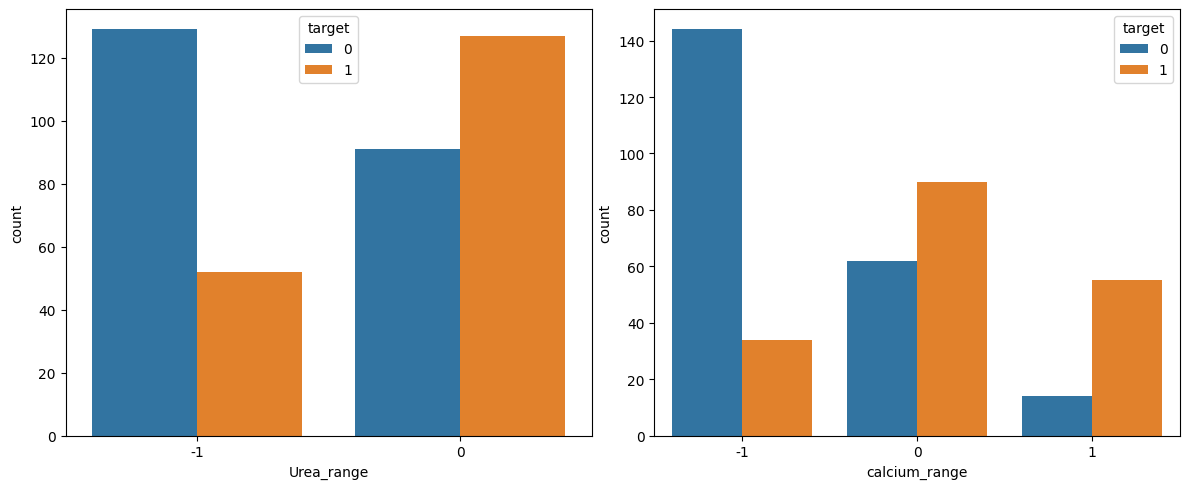

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes = axes.flatten()

for i in range(len(discrete_feat)):
    sns.countplot(x=train[discrete_feat[i]],hue=train['target'], ax=axes[i],)
    plt.tight_layout(h_pad=0.5,w_pad=0.5)
plt.show()

### Observation :<br>
    These visualization seem to be pretty useful.
    1)The Urea range tells us the higher amt of urea equals more likely to to have kidney stone and lower amt of urea equals lower chances of having the kidney stone.<br>
    2) The chances of having a kidney stone is drastically decreased whenever the calc range is either too low or too high but it increases when in normal range(This is not really making logic to the real world as our range might be improper)

### Correlation plot of the entire data ( Feature Selection)

<Axes: >

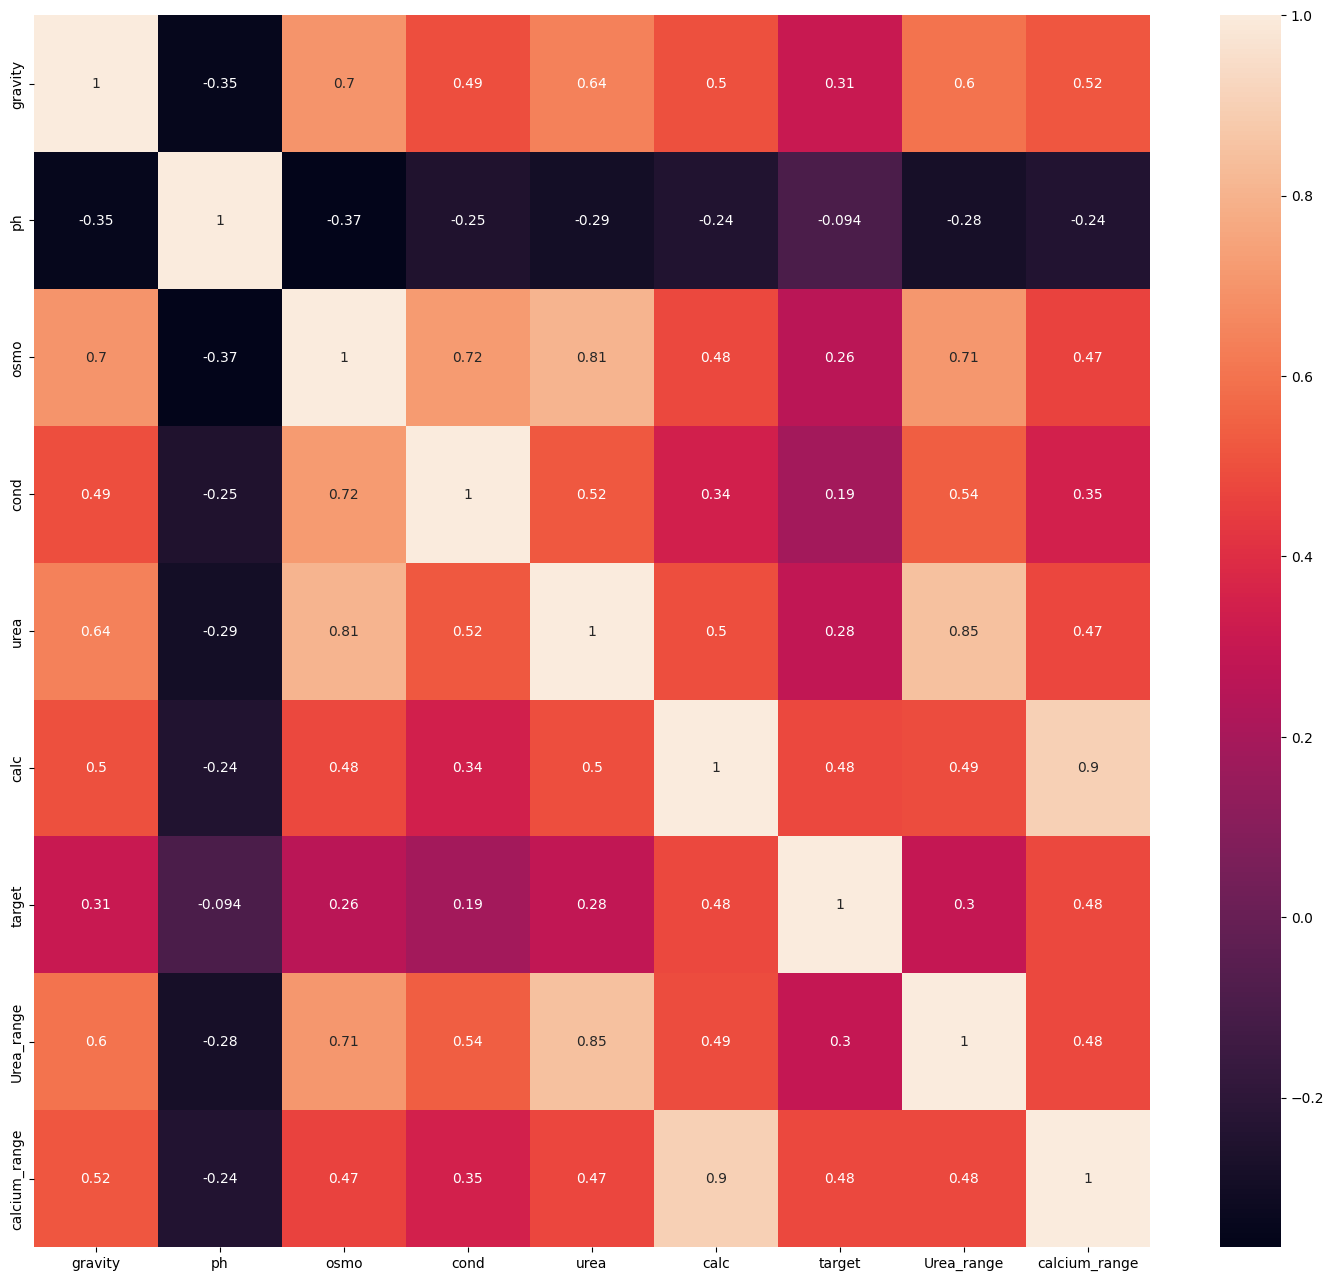

In [33]:
plt.figure(figsize=(18,16))
sns.heatmap(train.corr(), annot=True)

#### we knew we would have to drop either of the engineered features or the original features:
    1)As the Urea_range makes more sense than the amount of urea to the target variable we would drop the urea variable.
    2)In the second case both make an equal impact and as we saw the grouped data was no better than orignal data we will drop the grouped cal calcium_range

In [34]:
train.drop(['calcium_range', 'urea'], axis=1, inplace=True)
train.shape

(399, 7)

### Now we have our clean and preprocessed data ready !

In [35]:
train = train[['gravity','ph','osmo','cond','calc','Urea_range','target']]
train

,gravity,ph,osmo,cond,calc,Urea_range,target
0,1.013,6.19,443,14.8,1.45,-1,0
1,1.025,5.40,703,23.6,4.18,0,0
2,1.009,6.13,371,24.5,9.04,-1,0
3,1.021,4.91,442,20.8,6.63,0,1
4,1.021,5.53,874,17.8,2.21,0,1
...,...,...,...,...,...,...,...
409,1.011,5.21,527,21.4,1.53,-1,0
410,1.024,5.53,577,19.7,0.77,-1,0
411,1.018,6.28,455,22.2,7.68,0,1
412,1.008,7.12,325,12.6,1.03,-1,1


In [36]:
train['target'].value_counts()

0    220
1    179
Name: target, dtype: int64

In [37]:
train.describe()

,gravity,ph,osmo,cond,calc,Urea_range,target
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,1.017742,5.900652,649.596491,21.360652,4.117218,-0.453634,0.448622
std,0.006483,0.568018,234.005508,7.620923,3.233438,0.498471,0.497978
min,1.005000,4.760000,187.000000,5.100000,0.170000,-1.000000,0.000000
25%,1.012000,5.530000,452.500000,15.500000,1.450000,-1.000000,0.000000
50%,1.018000,5.710000,680.000000,21.900000,3.040000,0.000000,0.000000
75%,1.022000,6.270000,840.000000,27.600000,6.630000,0.000000,1.000000
max,1.034000,7.380000,1236.000000,38.000000,14.340000,0.000000,1.000000


<Axes: >

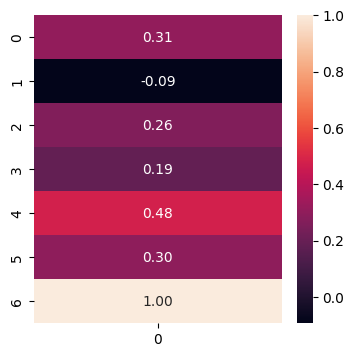

In [38]:
plt.figure(figsize=(4,4))
sns.heatmap(train.corr()['target'].values.reshape(-1,1), annot=True, fmt='.2f')

<Axes: >

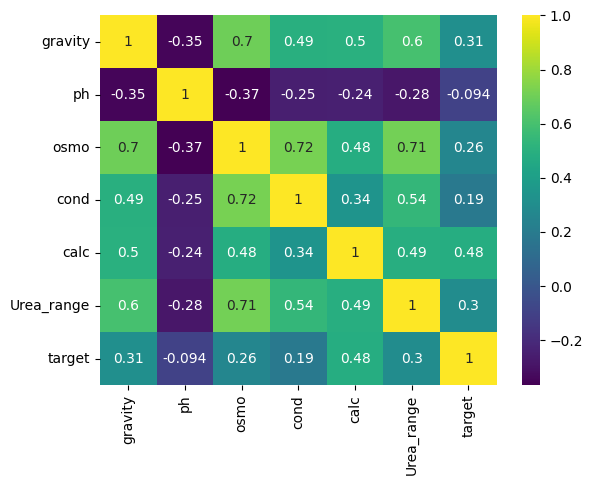

In [39]:
sns.heatmap(train.corr(),annot=True , cmap='viridis')

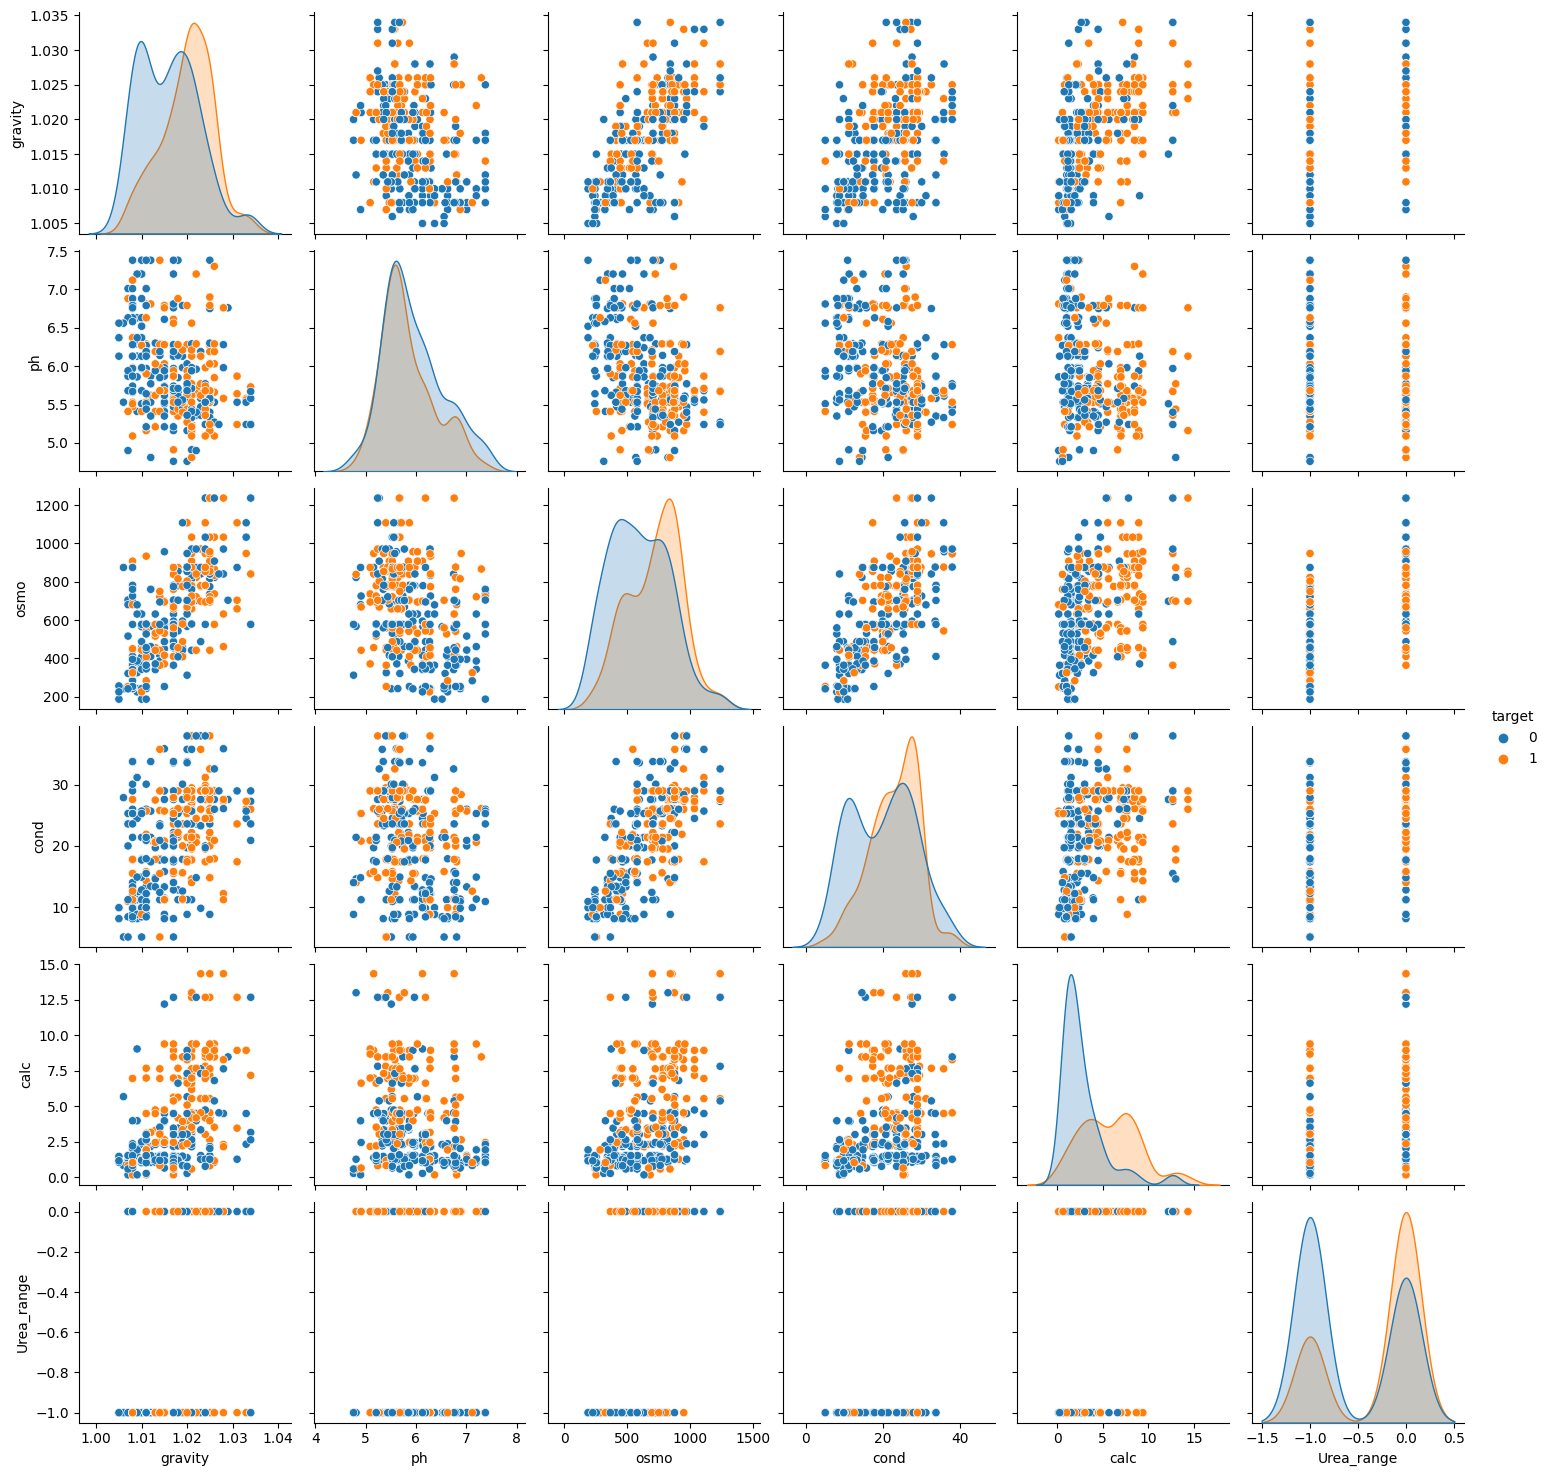

In [40]:
sns.pairplot(data=train, hue='target' )

In [41]:
x = train.drop(columns=['target']).values
y = train['target'].values

In [42]:
print(x.shape, y.shape)

(399, 6) (399,)


### Dividing Data into Train and Test data

In [43]:
from sklearn.model_selection import train_test_split
#Can also use StratifiedKFold
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, shuffle=True, test_size=0.2)

### Model Building

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#can also use Randomized Search /Grid Search

pca = PCA(n_components=2)
scaler = StandardScaler()
rforest = RandomForestClassifier()
dtree = DecisionTreeClassifier()
l_reg = LogisticRegression()
svc = SVC()
naive_bayes = GaussianNB()
xgb = XGBClassifier()
knc = KNeighborsClassifier()

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(319, 6)
(80, 6)
(319,)
(80,)


### Scaling the Independent features 

In [46]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Applying PCA for Dimensionality Reduction

In [47]:
######Giving bad results
# x_train = pca.fit_transform(x_train)
# x_test = pca.transform(x_test)

### Fitting and Predicting using ML models

In [48]:
models = [rforest,dtree,l_reg,svc,naive_bayes,xgb,knc]
for i in models:
    i.fit(x_train, y_train)

In [49]:
models_preds = []
models_names=['rforest_pred', 'dtree_pred', 'l_reg_pred', 'svc_pred', 'naive_bayes_pred', 'xgb_pred', 'knc_pred']

for i, j in zip(models, models_names):
    j = i.predict(x_test)
    models_preds.append(j)

In [50]:
from sklearn.metrics import accuracy_score
models2 = models_preds
models2_names=['rforest_score','dtree_score','l_reg_score','svc_score','naive_bayes_score','xgb_score', 'knc_pred']
acc = []

for i, j in zip(models2, models2_names):
    j = accuracy_score(i, y_test)
    acc.append(j)

In [51]:
from sklearn.metrics import confusion_matrix
models2 = models_preds
models2_names=['rforest_score','dtree_score','l_reg_score','svc_score','naive_bayes_score','xgb_score', 'knc_pred']
conf = []

for i, j in zip(models2, models2_names):
    j = confusion_matrix(i, y_test)
    conf.append(j)

### Model Evaluation

In [52]:
for i,j in zip(models, conf):
    print(f'{i} Conf. matrix : \n', j)

RandomForestClassifier() Conf. matrix : 
 [[40  7]
 [ 7 26]]
DecisionTreeClassifier() Conf. matrix : 
 [[35  7]
 [12 26]]
LogisticRegression() Conf. matrix : 
 [[43  8]
 [ 4 25]]
SVC() Conf. matrix : 
 [[42 10]
 [ 5 23]]
GaussianNB() Conf. matrix : 
 [[31  8]
 [16 25]]
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ra

In [53]:
for i,j in zip(models, acc):
    print(f'{i} Accuracy score : ', j)

RandomForestClassifier() Accuracy score :  0.825
DecisionTreeClassifier() Accuracy score :  0.7625
LogisticRegression() Accuracy score :  0.85
SVC() Accuracy score :  0.8125
GaussianNB() Accuracy score :  0.7
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) Accuracy score :  0.8125
KNeighborsClas

### Building pipeline 
As models in real world need to be scalable and applicable on the new data and cannot be manually preprocessed everytime .

In [54]:
train_n = pd.read_csv('train.csv')
train_n.shape

(414, 8)

In [55]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class Urea_range_transformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X['Urea_range'] = np.where( X['urea'] < 250, -1 , np.where(X['urea'] > 650,1, 0))
        return X

class DropColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(columns=self.columns_to_drop, axis=1, )
        # return X
    
##### As we cannot trim the outlier data from test set we will cap them. and we leave the outliers as they are the model 
#### will perform bad.
class OutlierCapperTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, multiplier=1.5):
        self.multiplier = multiplier
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        data = X.copy()
        for col in data.columns:
            q1 = np.percentile(data[col], 25)
            q3 = np.percentile(data[col], 75)
            IQR_range = q3-q1
            lower_bound = q1-IQR_range*self.multiplier
            upper_bound = q3+IQR_range*self.multiplier
            data[col] = np.where(data[col]> upper_bound, upper_bound, np.where(data[col] < lower_bound, lower_bound, data[col]))
        return data

class Outlier_Trimmer_Transformer():
    def __init__(self, multiplier=1.5):
        self.multiplier = multiplier
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        data = X.copy()
        for col in data.columns:
            q1 = np.percentile(data[col], 25)
            q3 = np.percentile(data[col], 75)
            IQR_range = q3-q1
            lower_bound = q1-IQR_range*self.multiplier
            upper_bound = q3+IQR_range*self.multiplier
            data = data[(data[col] > lower_bound) & (data[col] < upper_bound)]
        return data

In [56]:
from sklearn.pipeline import Pipeline
drop_cols =['id', 'urea']
train_preprocessing_pipeline = Pipeline([('urea_range ', Urea_range_transformer()),
                    ('drop_columns', DropColumnTransformer(columns_to_drop=drop_cols)),
                    ('outlier_trimmer', Outlier_Trimmer_Transformer(multiplier=1.5))])

model_pipeline = Pipeline([('scaler', StandardScaler()),
                    ('logistic_regression ', LogisticRegression())])

test_preprocessing_pipeline = Pipeline([('urea_range ', Urea_range_transformer()),
                    ('drop_columns', DropColumnTransformer(columns_to_drop=drop_cols)),
                    ('outlier_capper', OutlierCapperTransformer(multiplier=1.5))])

### Fitting and Transforming using Pipeline

In [57]:
train_preprocessing_pipeline

Pipeline(steps=[('urea_range ', Urea_range_transformer()),
                ('drop_columns',
                 DropColumnTransformer(columns_to_drop=['id', 'urea'])),
                ('outlier_trimmer',
                 <__main__.Outlier_Trimmer_Transformer object at 0x0000010E2EB387F0>)])

In [58]:
transformed_train_data = train_preprocessing_pipeline.fit_transform(train_n)
transformed_train_data.shape

(399, 7)

In [59]:
x_train, x_val, y_train, y_val = train_test_split(transformed_train_data.drop(columns=['target']), transformed_train_data['target'], test_size=0.2, random_state=42)

In [60]:
model_pipeline.fit(x_train,  y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_regression ', LogisticRegression())])

### Predicting using Pipeline

In [61]:
y_pred = model_pipeline.predict(x_val)

### Pipeline Evaluation

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_val,y_pred)

array([[43,  4],
       [ 8, 25]], dtype=int64)

as we can see the model is performing good in predicting both the classes. And not biased

In [63]:
print('Accuracy : ', accuracy_score(y_val,y_pred))

Accuracy :  0.85


### Predicting on the Test data using pipeline

In [64]:
test = pd.read_csv('test.csv')
test

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36
...,...,...,...,...,...,...,...
271,685,1.029,6.27,853,21.4,364,7.31
272,686,1.012,5.62,410,14.0,195,1.45
273,687,1.031,5.68,874,29.0,380,4.49
274,688,1.019,5.47,543,21.4,170,1.64


In [65]:
test_preprocessing_pipeline

Pipeline(steps=[('urea_range ', Urea_range_transformer()),
                ('drop_columns',
                 DropColumnTransformer(columns_to_drop=['id', 'urea'])),
                ('outlier_capper', OutlierCapperTransformer())])

In [66]:
transformed_test_data = test_preprocessing_pipeline.fit_transform(test)
transformed_test_data.shape

(276, 6)

In [67]:
predictions = model_pipeline.predict(transformed_test_data)
predictions

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [68]:
final_data = pd.DataFrame()
final_data['id'] = range(414,690)
final_data.set_index('id', inplace=True)
final_data['target'] = predictions
final_data

,target
id,
414,0
415,0
416,1
417,0
418,0
...,...
685,1
686,0
687,1


In [69]:
final_data.to_csv('final_preds.csv')